In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 600})
# Use valid rcParams keys: set serif family and specify Times New Roman
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})
import re
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/arXiver/2025_Data.csv')
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",NaN
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,"United Kingdom, United Kingdom, United Kingdom..."
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],NaN
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...","Italy, France"
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,Cosmic Himalayas in CROCODILE : Probing the Ex...,The recently reported Cosmic Himalayas (CH) --...,"['Yuto Kuwayama', 'Yongming Liang', 'Kentaro N...",10.0,18.0,5.0,arxiv.org/pdf/2512.24966,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,...,NaN,0,"[None, None, None, None, None, None, None, Non...",0.0,0.0,0,1,"['Apparent anomaly', 'Clustering', 'Cosmologic...",['Hydrodynamicalsimulations(767)'],"Japan, Japan, Japan, Japan, Japan, Japan, Unit..."
18656,Multi-Frequency Study of FRB20201124A with the...,We present results from multi-epoch observatio...,"['C. Dudeja', 'J. Roy', 'U. Panda', 'S. Bhatta...",11.0,17.0,1.0,arxiv.org/pdf/2512.24978,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,0,"['FRB', 'FRBs', 'Fast radio burst']",[],"India, India, India, India"
18657,Distributions of wide binary stars in theory a...,"Using the censored catalog of 103,169 resolved...",['Valeri V. Makarov'],7.0,13.0,1.0,arxiv.org/pdf/2512.25002,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,[None],0.0,0.0,1,1,"['A stars', 'A type stars', 'A-type stars']",[],United States
18658,Towards precision cosmology with Voids x CMB c...,We construct and validate a set of multi-purpo...,"['Mar Pérez Sar', 'Carlos Hernández Monteagudo...",8.0,19.0,1.0,arxiv.org/pdf/2512.25040,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,1,"['CMB', 'Catalogs', 'Clustering']",['Cosmology: Large-scale structure - Cosmic mi...,"Spain, Spain, Hungary, Hungary, France, United..."


In [3]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [21]:
# Calculate average papers per month (Total count / 12 months)
monthly_avg_count = data.groupby('month').size().mean()
print(f'Average papers per month: {monthly_avg_count}')

# Calculate the total number of days and business days in 2025
total_days_2025 = 0
total_business_days_2025 = 0

for m in range(1, 13):
    start_date = f'2025-{m:02d}-01'
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    
    # Total days in month
    total_days_2025 += pd.Period(f'2025-{m:02d}').days_in_month
    
    # Business days in month (numpy busday_count excludes weekends by default)
    # np.busday_count requires dates in YYYY-MM-DD format. 
    # The end date is exclusive, so we need the first day of the next month for accurate count logic, 
    # or just iterate all days. Making it simple here using np.busday_count:
    next_month_start = (pd.to_datetime(start_date) + pd.offsets.MonthBegin(1)).strftime('%Y-%m-%d')
    total_business_days_2025 += np.busday_count(start_date, next_month_start)

# Average number of days per month
avg_days_in_month = total_days_2025 / 12
avg_business_days_in_month = total_business_days_2025 / 12

# Average papers per day (exclude saturday and sunday)
daily_avg = monthly_avg_count / avg_business_days_in_month
print(f'Average papers per day (excluding weekends): {daily_avg:.2f}')

# Average papers per day (include saturday and sunday)
daily_avg_incl_weekends = monthly_avg_count / avg_days_in_month
print(f'Average papers per day (including weekends): {daily_avg_incl_weekends:.2f}')

Average papers per month: 1555.0
Average papers per day (excluding weekends): 71.49
Average papers per day (including weekends): 51.12


In [9]:
# Most active months of the year in descending order
monthly_counts = data['date'].dt.month_name().value_counts().sort_values(ascending=False)
print('Most active months of the year (descending order):')
for month, count in monthly_counts.items():
    print(f'{month}: {count} papers')

Most active months of the year (descending order):
October: 1889 papers
September: 1860 papers
July: 1816 papers
December: 1694 papers
March: 1585 papers
November: 1551 papers
June: 1478 papers
April: 1466 papers
May: 1386 papers
January: 1344 papers
August: 1304 papers
February: 1287 papers


In [12]:
# How many sigma away is December from July
december_count = monthly_counts.get('December', 0)
july_count = monthly_counts.get('July', 0)
mean_count = monthly_counts.mean()
std_count = monthly_counts.std()
sigma_away = (july_count - december_count) / std_count
print(f'December is {sigma_away:.2f} sigma away from July.')

December is 0.56 sigma away from July.


In [13]:
# Average number of papers per day for each month in descending order
average_daily_counts = {}
for month in range(1, 13):
    month_name = pd.to_datetime(f'2025-{month:02d}-01').strftime('%B')
    days_in_month = pd.Period(f'2025-{month:02d}').days_in_month
    total_papers = monthly_counts.get(month_name, 0)
    average_daily_counts[month_name] = total_papers / days_in_month
sorted_average_daily_counts = dict(sorted(average_daily_counts.items(), key=lambda item: item[1], reverse=True))
print('Average number of papers per day for each month (descending order):')
for month, avg_count in sorted_average_daily_counts.items():
    print(f'{month}: {avg_count:.2f} papers/day')

Average number of papers per day for each month (descending order):
September: 62.00 papers/day
October: 60.94 papers/day
July: 58.58 papers/day
December: 54.65 papers/day
November: 51.70 papers/day
March: 51.13 papers/day
June: 49.27 papers/day
April: 48.87 papers/day
February: 45.96 papers/day
May: 44.71 papers/day
January: 43.35 papers/day
August: 42.06 papers/day


In [22]:
# AAC for all papers
total_papers_2025 = len(data)
aac_all_papers = data['total_citations'].sum() / total_papers_2025
print(f'Average citations per paper (AAC) for all papers: {aac_all_papers:.2f}')

# EAAC for all papers
eaac_all_papers = data['non_self_citations'].sum() / total_papers_2025
print(f'External average citations per paper (EAAC) for all papers: {eaac_all_papers:.2f}')

# JAC for all papers
journal_data = data[data['journal_flag' ]==1]
total_journal_papers = len(journal_data)
jac_all_papers = journal_data['total_citations'].sum() / total_journal_papers
print(f'Journal average citations per paper (JAC) for all journal papers: {jac_all_papers:.2f}')

# EJAC for all papers
ejac_all_papers = journal_data['non_self_citations'].sum() / total_journal_papers
print(f'External journal average citations per paper (EJAC) for all journal papers: {ejac_all_papers:.2f}')

Average citations per paper (AAC) for all papers: 2.53
External average citations per paper (EAAC) for all papers: 1.77
Journal average citations per paper (JAC) for all journal papers: 2.84
External journal average citations per paper (EJAC) for all journal papers: 1.97


/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_98676/2321886666.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('jet', len(sorted_subjects))


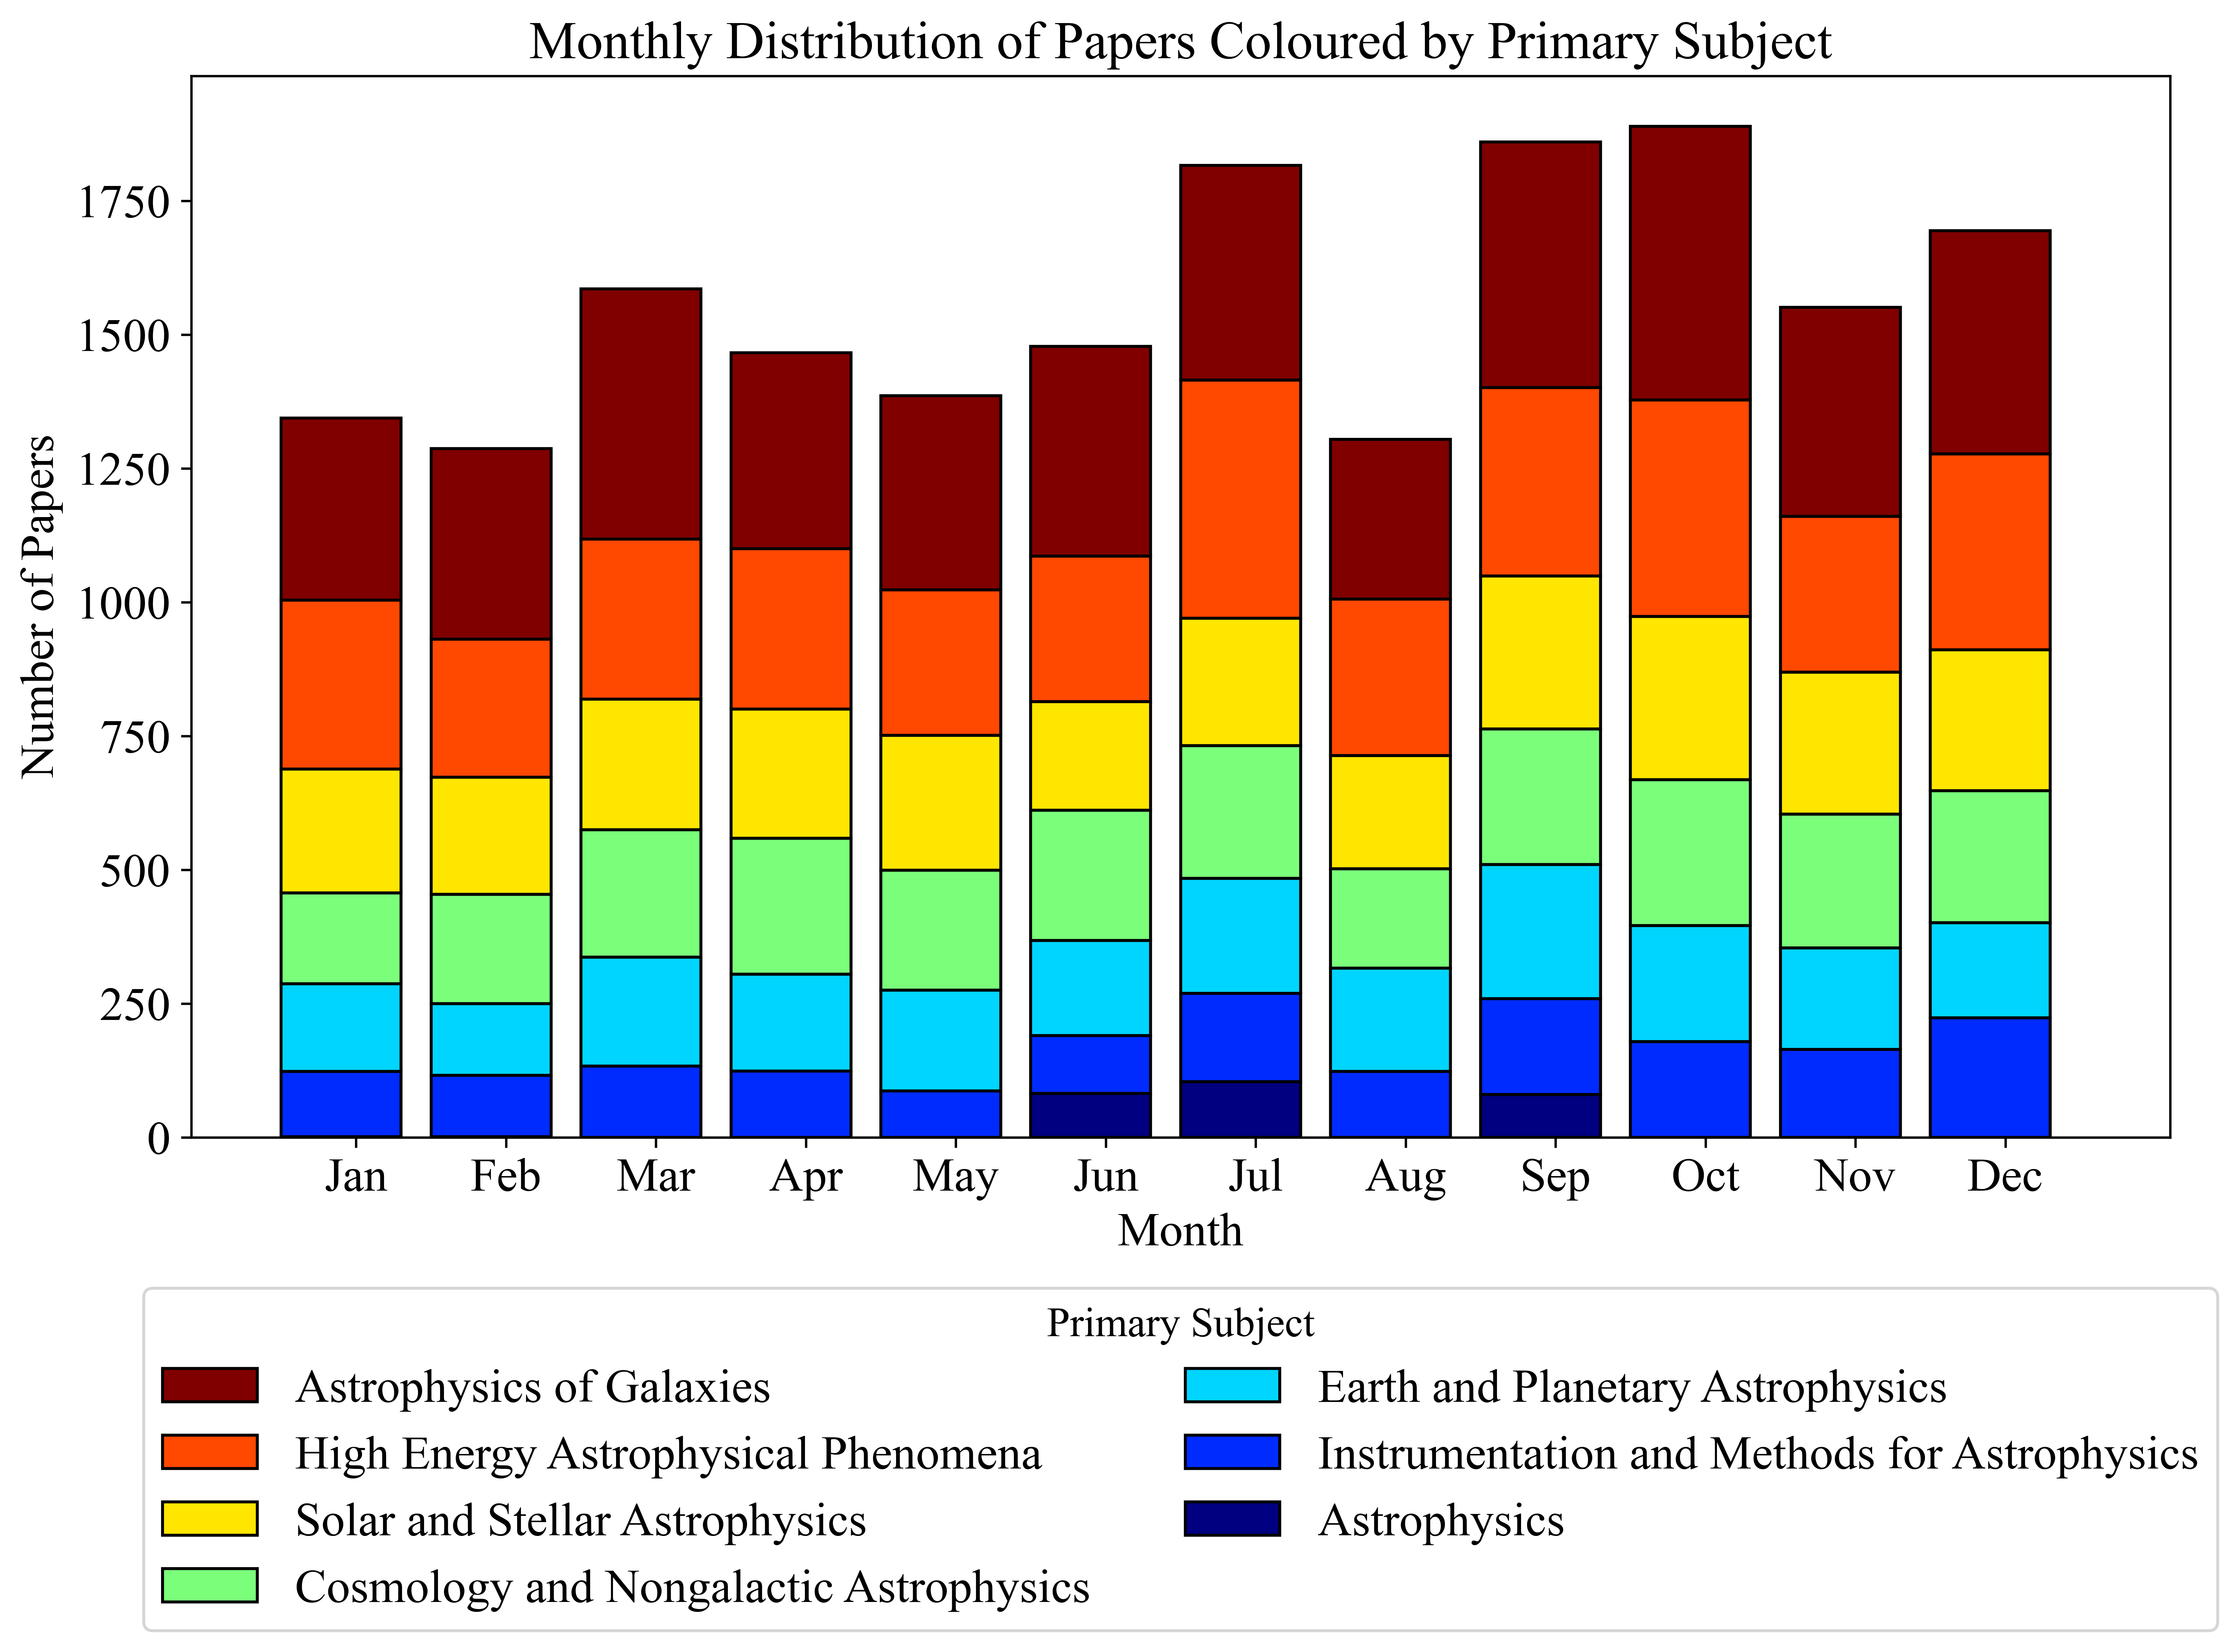

In [61]:
# Plot of Primary Subjects Distribution per Month
subjects = data['primary_subject'].unique()

# Calculate total counts to sort
subject_counts = data['primary_subject'].value_counts()
# Sort subjects by count (ascending for largest at top in standard stack, or descending)
sorted_subjects = subject_counts.sort_values(ascending=True).index.tolist()

data_by_subject = [data[data['primary_subject'] == s]['month'] for s in sorted_subjects]

# Get Set1 colormap
cmap = plt.cm.get_cmap('jet', len(sorted_subjects))
# Flip colour map: Reverse indices so the last item (largest subject/top of stack) gets index 0 (Red)
colours = [cmap(i) for i in (range(len(sorted_subjects)))]

bins = np.arange(0.5, 13.5, 1)

# Increase figure size
plt.figure(figsize=(11, 8))

plt.hist(data_by_subject, bins=bins, stacked=True, edgecolor='black', label=sorted_subjects, width=0.8, color=colours)

# Increase font sizes
plt.title('Monthly Distribution of Papers Coloured by Primary Subject', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Papers', fontsize=16)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16)
plt.yticks(fontsize=16)

# Reset y-axis limit to just fit data comfortably
plt.ylim(0, data['month'].value_counts().max() * 1.05)

# Reverse legend to match visual stack order (top to bottom) and place at the bottom
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Primary Subject', loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=16, title_fontsize=14, ncol=2)

plt.tight_layout()
plt.show()


In [63]:
# How many papers published under Primary Subject 'Astrophysics of Galaxies'
astro_galaxies_count = subject_counts.get('Astrophysics of Galaxies', 0)
print(f'Number of papers published under Primary Subject "Astrophysics of Galaxies": {astro_galaxies_count}')


# Papers per month avearge for 'Astrophysics of Galaxies'
astro_galaxies_data = data[data['primary_subject'] == 'Astrophysics of Galaxies']
astro_galaxies_monthly_avg = astro_galaxies_data.groupby('month').size().mean()
print(f'Average papers per month for "Astrophysics of Galaxies": {astro_galaxies_monthly_avg:.2f}')

Number of papers published under Primary Subject "Astrophysics of Galaxies": 4761
Average papers per month for "Astrophysics of Galaxies": 396.75


In [65]:
# How many papers have a secondary subject 
secondary_subject_count = data['secondary_subjects'].notnull().sum()
print(f'Number of papers with a secondary subject: {secondary_subject_count}')

Number of papers with a secondary subject: 8684


In [71]:
# Table Stats (Table 1)
# Annual Count for each Primary Subject
annual_counts = data['primary_subject'].value_counts().sort_values(ascending=False)
print('Annual Count for each Primary Subject:')
for subject, count in annual_counts.items():
    print(f'{subject}: {count} papers')

# Average number per month for each Primary Subject
print('Average number of papers per month for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[data['primary_subject'] == subject]
    monthly_avg = subject_data.groupby('month').size().mean()
    print(f'{subject}: {int(round(monthly_avg))} papers/month')

# Average number per day for each Primary Subject (excluding weekends)
print('Average number of papers per day (excluding weekends) for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[data['primary_subject'] == subject]
    monthly_avg = subject_data.groupby('month').size().mean()
    daily_avg = monthly_avg / avg_business_days_in_month
    print(f'{subject}: {int(round(daily_avg))} papers/day')

# Average number per day for each Primary Subject (including weekends)
print('Average number of papers per day (including weekends) for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[data['primary_subject'] == subject]
    monthly_avg = subject_data.groupby('month').size().mean()
    daily_avg_incl_weekends = monthly_avg / avg_days_in_month
    print(f'{subject}: {int(round(daily_avg_incl_weekends))} papers/day')



Annual Count for each Primary Subject:
Astrophysics of Galaxies: 4761 papers
High Energy Astrophysical Phenomena: 3869 papers
Solar and Stellar Astrophysics: 2958 papers
Cosmology and Nongalactic Astrophysics: 2789 papers
Earth and Planetary Astrophysics: 2293 papers
Instrumentation and Methods for Astrophysics: 1722 papers
Astrophysics: 268 papers
Average number of papers per month for each Primary Subject:
Astrophysics of Galaxies: 397 papers/month
High Energy Astrophysical Phenomena: 322 papers/month
Solar and Stellar Astrophysics: 246 papers/month
Cosmology and Nongalactic Astrophysics: 232 papers/month
Earth and Planetary Astrophysics: 191 papers/month
Instrumentation and Methods for Astrophysics: 144 papers/month
Astrophysics: 54 papers/month
Average number of papers per day (excluding weekends) for each Primary Subject:
Astrophysics of Galaxies: 18 papers/day
High Energy Astrophysical Phenomena: 15 papers/day
Solar and Stellar Astrophysics: 11 papers/day
Cosmology and Nongalacti

In [72]:
# Highest Month Count for Each Primary Subject
print('Highest Month Count for Each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[data['primary_subject'] == subject]
    monthly_counts_subject = subject_data['date'].dt.month_name().value_counts()
    highest_month = monthly_counts_subject.idxmax()
    highest_count = monthly_counts_subject.max()
    print(f'{subject}: {highest_month} with {highest_count} papers')

Highest Month Count for Each Primary Subject:
Astrophysics of Galaxies: October with 511 papers
High Energy Astrophysical Phenomena: July with 445 papers
Solar and Stellar Astrophysics: October with 305 papers
Cosmology and Nongalactic Astrophysics: October with 272 papers
Earth and Planetary Astrophysics: September with 251 papers
Instrumentation and Methods for Astrophysics: December with 223 papers
Astrophysics: July with 104 papers


In [73]:
# AAC for each Primary Subject
print('Average citations per paper (AAC) for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[data['primary_subject'] == subject]
    total_subject_papers = len(subject_data)
    aac_subject = subject_data['total_citations'].sum() / total_subject_papers
    print(f'{subject}: {aac_subject:.2f} citations/paper')

Average citations per paper (AAC) for each Primary Subject:
Astrophysics of Galaxies: 2.78 citations/paper
High Energy Astrophysical Phenomena: 2.29 citations/paper
Solar and Stellar Astrophysics: 1.41 citations/paper
Cosmology and Nongalactic Astrophysics: 4.83 citations/paper
Earth and Planetary Astrophysics: 2.25 citations/paper
Instrumentation and Methods for Astrophysics: 1.06 citations/paper
Astrophysics: 2.06 citations/paper


In [74]:
# EAAC for each Primary Subject
print('External average citations per paper (EAAC) for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[data['primary_subject'] == subject]
    total_subject_papers = len(subject_data)
    eaac_subject = subject_data['non_self_citations'].sum() / total_subject_papers
    print(f'{subject}: {eaac_subject:.2f} citations/paper')

External average citations per paper (EAAC) for each Primary Subject:
Astrophysics of Galaxies: 1.75 citations/paper
High Energy Astrophysical Phenomena: 1.66 citations/paper
Solar and Stellar Astrophysics: 0.93 citations/paper
Cosmology and Nongalactic Astrophysics: 3.86 citations/paper
Earth and Planetary Astrophysics: 1.47 citations/paper
Instrumentation and Methods for Astrophysics: 0.59 citations/paper
Astrophysics: 1.47 citations/paper


In [75]:
# JAC for each Primary Subject
print('Journal average citations per paper (JAC) for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[(data['primary_subject'] == subject) & (data['journal_flag'] == 1)]
    total_subject_journal_papers = len(subject_data)
    jac_subject = subject_data['total_citations'].sum() / total_subject_journal_papers
    print(f'{subject}: {jac_subject:.2f} citations/paper')

Journal average citations per paper (JAC) for each Primary Subject:
Astrophysics of Galaxies: 2.93 citations/paper
High Energy Astrophysical Phenomena: 2.58 citations/paper
Solar and Stellar Astrophysics: 1.62 citations/paper
Cosmology and Nongalactic Astrophysics: 7.02 citations/paper
Earth and Planetary Astrophysics: 2.55 citations/paper
Instrumentation and Methods for Astrophysics: 1.54 citations/paper
Astrophysics: 2.65 citations/paper


In [76]:
# EJAC for each Primary Subject
print('External journal average citations per paper (EJAC) for each Primary Subject:')
for subject in annual_counts.index:
    subject_data = data[(data['primary_subject'] == subject) & (data['journal_flag'] == 1)]
    total_subject_journal_papers = len(subject_data)
    ejac_subject = subject_data['non_self_citations'].sum() / total_subject_journal_papers
    print(f'{subject}: {ejac_subject:.2f} citations/paper')

External journal average citations per paper (EJAC) for each Primary Subject:
Astrophysics of Galaxies: 1.86 citations/paper
High Energy Astrophysical Phenomena: 1.81 citations/paper
Solar and Stellar Astrophysics: 1.07 citations/paper
Cosmology and Nongalactic Astrophysics: 5.57 citations/paper
Earth and Planetary Astrophysics: 1.72 citations/paper
Instrumentation and Methods for Astrophysics: 0.91 citations/paper
Astrophysics: 1.93 citations/paper


In [78]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries,month,day
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",NaN,1,1
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,"United Kingdom, United Kingdom, United Kingdom...",1,1
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],NaN,1,1
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...","Italy, France",1,1
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Germany,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,Cosmic Himalayas in CROCODILE : Probing the Ex...,The recently reported Cosmic Himalayas (CH) --...,"['Yuto Kuwayama', 'Yongming Liang', 'Kentaro N...",10.0,18.0,5.0,arxiv.org/pdf/2512.24966,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,...,"[None, None, None, None, None, None, None, Non...",0.0,0.0,0,1,"['Apparent anomaly', 'Clustering', 'Cosmologic...",['Hydrodynamicalsimulations(767)'],"Japan, Japan, Japan, Japan, Japan, Japan, Unit...",12,31
18656,Multi-Frequency Study of FRB20201124A with the...,We present results from multi-epoch observatio...,"['C. Dudeja', 'J. Roy', 'U. Panda', 'S. Bhatta...",11.0,17.0,1.0,arxiv.org/pdf/2512.24978,High Energy Astrophysical Phenomena,NaN,NaN,...,"[None, None, None, None]",0.0,0.0,0,0,"['FRB', 'FRBs', 'Fast radio burst']",[],"India, India, India, India",12,31
18657,Distributions of wide binary stars in theory a...,"Using the censored catalog of 103,169 resolved...",['Valeri V. Makarov'],7.0,13.0,1.0,arxiv.org/pdf/2512.25002,Solar and Stellar Astrophysics,NaN,NaN,...,[None],0.0,0.0,1,1,"['A stars', 'A type stars', 'A-type stars']",[],United States,12,31
18658,Towards precision cosmology with Voids x CMB c...,We construct and validate a set of multi-purpo...,"['Mar Pérez Sar', 'Carlos Hernández Monteagudo...",8.0,19.0,1.0,arxiv.org/pdf/2512.25040,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,"[None, None, None, None]",0.0,0.0,0,1,"['CMB', 'Catalogs', 'Clustering']",['Cosmology: Large-scale structure - Cosmic mi...,"Spain, Spain, Hungary, Hungary, France, United...",12,31


In [81]:
# Secondary Subject Top 15 Counts
# Remove brackets and quotes from string representation of lists, then split by comma
secondary_subjects_series = data['secondary_subjects'].dropna().str.replace(r"[\[\]']", "", regex=True).str.split(',')

# Flatten the list and strip whitespace from each subject
all_secondary_subjects = [subject.strip() for sublist in secondary_subjects_series for subject in sublist if subject.strip()]

secondary_subject_counts = pd.Series(all_secondary_subjects).value_counts().head(15)
print('Top 15 Secondary Subjects by Count:')
for subject, count in secondary_subject_counts.items():
    print(f'{subject}: {count} papers')

Top 15 Secondary Subjects by Count:
Astrophysics of Galaxies: 2049 papers
Solar and Stellar Astrophysics: 1632 papers
Instrumentation and Methods for Astrophysics: 1224 papers
General Relativity and Quantum Cosmology: 1205 papers
High Energy Astrophysical Phenomena: 983 papers
Cosmology and Nongalactic Astrophysics: 892 papers
High Energy Physics - Phenomenology: 831 papers
Earth and Planetary Astrophysics: 605 papers
High Energy Physics - Theory: 340 papers
Space Physics: 263 papers
Plasma Physics: 223 papers
Machine Learning: 191 papers
Nuclear Theory: 149 papers
High Energy Physics - Experiment: 111 papers
Computational Physics: 80 papers
